# Wine Quality Prediction

###### Dataset contains information related to red and white variants of the Portuguese wine named as 'Vinho Verde'.

###### Dataset repository: [Winequality](https://archive.ics.uci.edu/ml/datasets/wine+quality)

###### Red and White wine dataset: [Red&White](https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv)

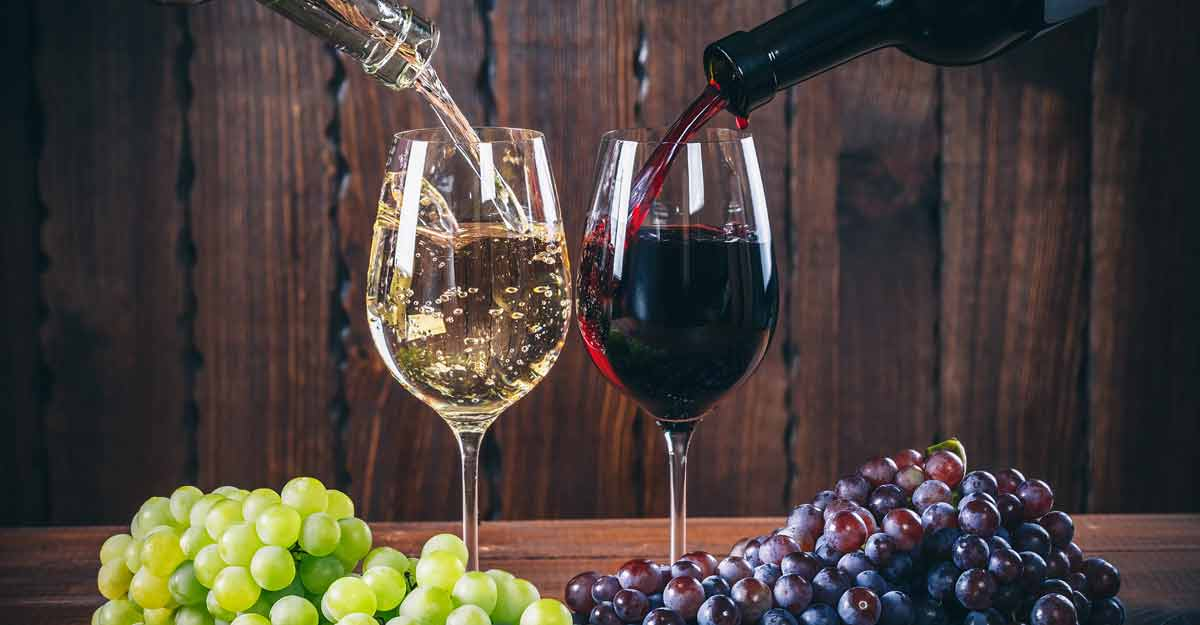


###### Source: [Red&White_Wines](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.onmanorama.com%2Ffood%2Frecipe%2F2019%2F11%2F08%2Fred-white-wine-christmas-recipe.html&psig=AOvVaw1XPJGc_gEthKcdfvitMHAC&ust=1614475738288000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCMCJ_vn0iO8CFQAAAAAdAAAAABAO)

--------------------
### Properties of the dataset:

` 1) Dataset contains 6497 observations and 13 columns`

` 2) There are 12 independent variables that predicts the quality of the wine`

` 3) One independent column is of Categorical type and the remaining columns contain numerical values`

` 4) The total memory used by the dataset in disk is just above 660 KB`


----------------------------------
## Overview:
------------

### Question:

##### 1) I never drank wine in my entire life but I am always curious to know what makes a good wine. So, I decided to apply some machine learning techniques to know what makes a good wine
------------

###### 2) In this project, I used UCI machine learning repository's wine quality dataset  [winequality](https://archive.ics.uci.edu/ml/datasets/wine+quality) to perform Exploratory Data Analysis on both Red and white wines.

###### 3) Later I will build a classification model to predict whether on not the quality of a particular wine is good

###### 4) To classify the quality to be either good or bad, I converted the dependent variable to a binary output variable i.e., if the rank of quality of the wine is greater than or equals to 6 it is considered to be a good quality wine

###### 5) The dependent variable: quality of wine is determined by 12 independent variables 
----------------------

## Importing the Libraries and packages:

In [65]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


###### There are 6497 rows and 13 columns. But the 13th column named as quality is considered to be the dependant variable

------------
## Descriptive Statistics:

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


###### df.describe() gives the descriptive statistics of all the numerical columns of the dataset

In [6]:
df['alcohol'].mean()

10.491800831149511

In [7]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

-------------------
## EDA through Visualization:

- Histogram plots
- Scatter plots
- Percentiles
- Boxplots
- Count plots
- Empirical Cumulative Distribution Function
- Violin
- Heatmaps
- Barplots
- Joint Distribution plots
- Distribution plots
- Correlation Matrix
--------------------

## Histogram:

Text(0, 0.5, 'Count')

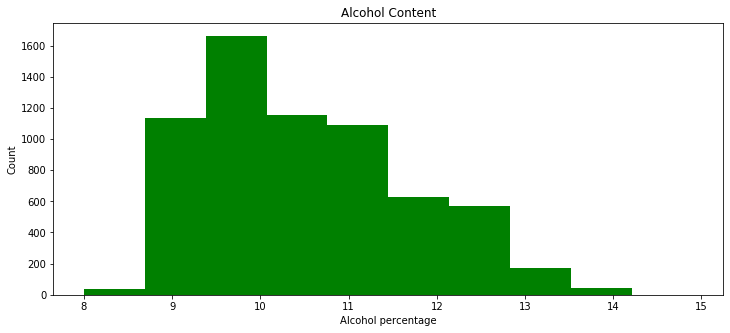

In [8]:
df['alcohol'].hist(bins=10, grid=False, figsize=(12,5), color='green')
plt.xlabel('Alcohol percentage')
plt.title('Alcohol Content')
plt.ylabel('Count')

###### It is very clear that most of the observations (around 1700) in our dataset are having a alcohol percentage of around 10 and only a few observations are having a alcohol percentage of less than 9 and greater than 13

Text(0.5, 0, 'alcohol percentage')

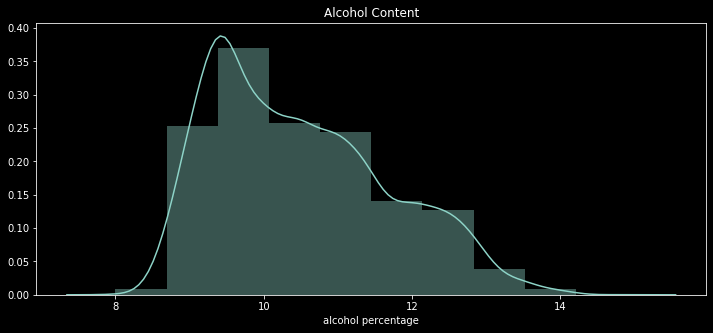

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(12,5))
sns.distplot(df['alcohol'], bins=10, kde=True)
plt.title('Alcohol Content')
plt.xlabel('alcohol percentage')

###### So it is very clear from the grpah that the most no. of observations are having a alcohol percentage of around 10. The continuous curve is a kernel density estimation curve which replaces every single observation with a Gaussian ditribution centered around that value`

**Most frequent alcohol percentage values:**

In [10]:
df['alcohol'].value_counts().head(10)

9.5     367
9.4     332
9.2     271
10.0    229
10.5    227
11.0    217
9.0     215
9.8     214
10.4    194
9.3     193
Name: alcohol, dtype: int64

.................................
## Scatter plot:

<Figure size 720x576 with 0 Axes>

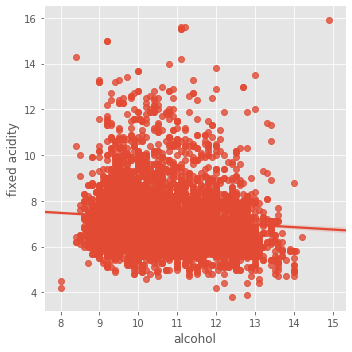

In [11]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.lmplot(x='alcohol', y='fixed acidity', data=df)

###### So the graph illustrates that there is a downward trend for fixed acidity with respect to alcohol percentage i.e., if the alcohol percentage is increasing then the fixed acidity value goes down

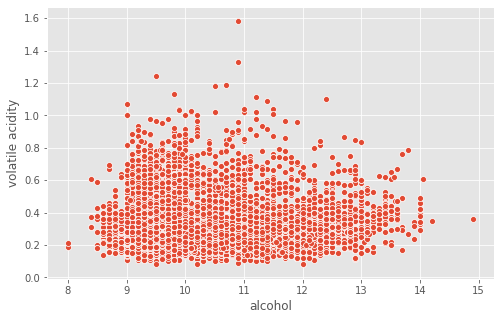

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='alcohol', y='volatile acidity', data=df)

###### The above plot illustrates that most no. of observations are having volatile acidity values between 0.2 to 0.8 whereas the most no. of observations are having alcohol percentage values between 9 to 11

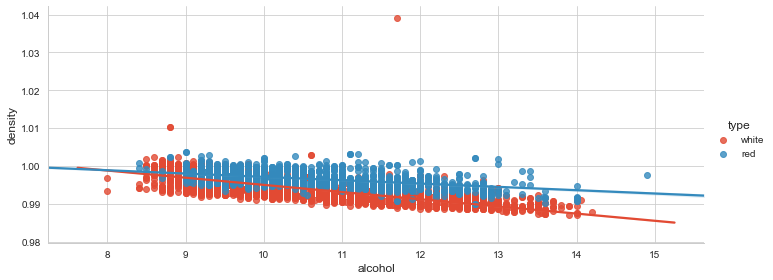

In [13]:
sns.set_style('whitegrid')
sns.lmplot(x='alcohol', y='density', data=df, hue='type', aspect=2.5, height=4)

###### It is clear that for most no. of observations density of red wine is greater than the density of white wine and for both wines the density is having a downward trend with respect to the alcohol percentage

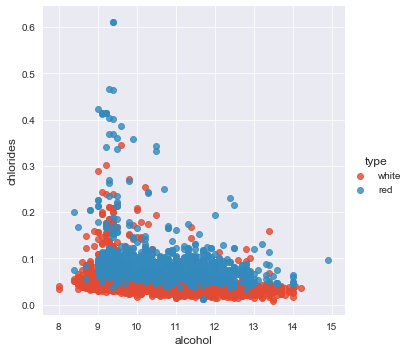

In [14]:
sns.set_style('darkgrid')
sns.lmplot(x='alcohol', y='chlorides', data=df, fit_reg=False, hue='type')

###### It is clear that for most no. of observations chlorides value of red wine is greater than the white wine and there is a downward trend for chlorides values with respect to the alcohol percentages for both the wines
------------------

## Percentiles:

In [15]:
print('10 percent of the observations are having a alcohol percentage under:', df['alcohol'].quantile(0.1))
print('\n')
print('25 percent of the observations are having a alcohol percentage under:', df['alcohol'].quantile(0.25))
print('\n')
print('50 percent of the observations are having a alcohol percentage under:', df['alcohol'].quantile(0.50))
print('\n')
print('99 percent of the observations are having a alcohol percentage under:', df['alcohol'].quantile(0.99))

10 percent of the observations are having a alcohol percentage under: 9.1


25 percent of the observations are having a alcohol percentage under: 9.5


50 percent of the observations are having a alcohol percentage under: 10.3


99 percent of the observations are having a alcohol percentage under: 13.4


--------------
## Boxplot and Outliers:

![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)


**Maximum = (Q3 + (1.5*IQR))**

**Minimum = (Q1 - (1.5*IQR))**

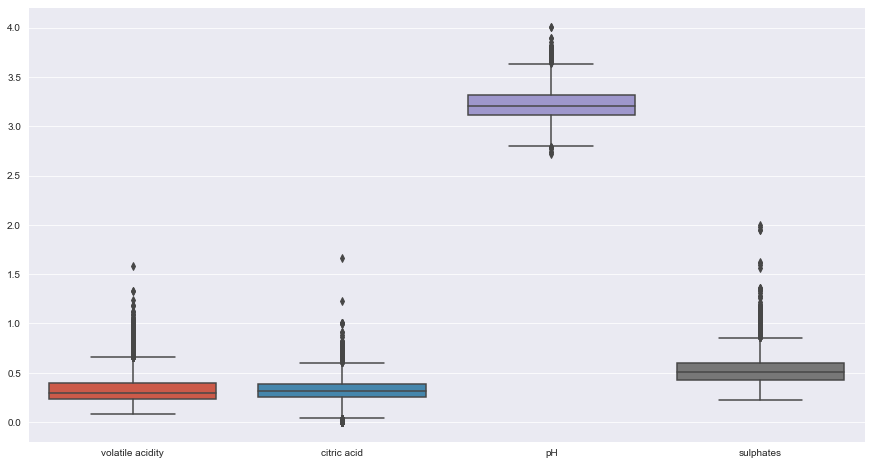

In [16]:
plt.figure(figsize=(15,8))
data = df.drop(['free sulfur dioxide', 'total sulfur dioxide', 'quality','residual sugar', 
                   'fixed acidity', 'alcohol', 'density', 'chlorides'], axis=1)

sns.boxplot(data=data)

###### It looks like all the four variables shown above are having outliers and 50% of observations are having a pH value between 3.1 to 3.4 approximately
-------------

## Count plot:

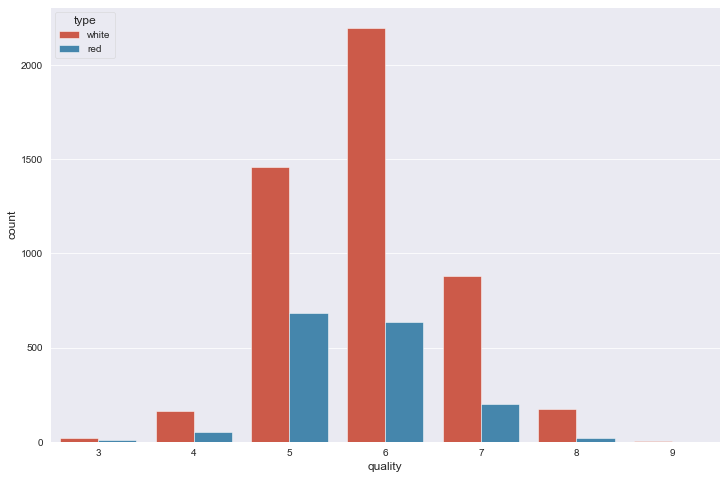

In [17]:
plt.figure(figsize=(12,8))

sns.countplot(x='quality', data=df, hue='type')

###### It shows that the most no. of observations of white wine are having a quality rank of 6 whereas the most no. of observations of red wine are having a quality rank of 5

----------------

## Creating Empirical Cummulative Distribution Function (ECDF):

<function matplotlib.pyplot.show(*args, **kw)>

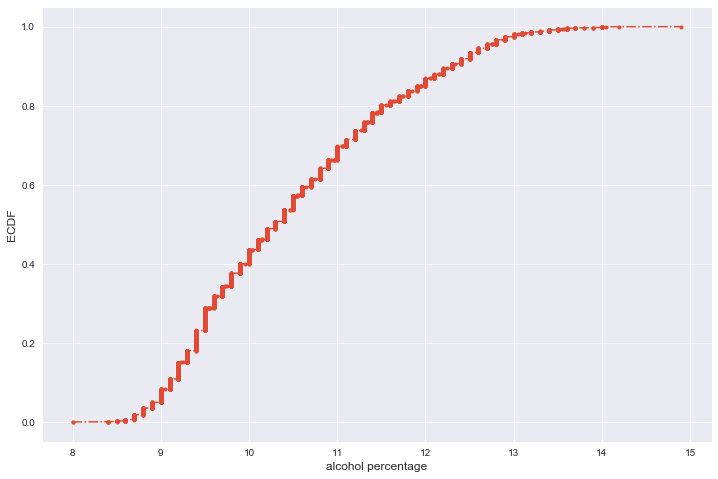

In [18]:
plt.figure(figsize=(12,8))

x = np.sort(df['alcohol'])
y = np.arange(1, len(x)+1) / len(x)

plt.plot(x, y, marker='.', linestyle='-.')

plt.xlabel('alcohol percentage')
plt.ylabel('ECDF')
plt.grid(True)
plt.show

###### The big vertical lines at an alcohol percentage values between 9.2 to 10 approximately tells that most no. of observations are having an alcohol percentage between 9.2 to 10

In [19]:
print('The above ECDF plot shows that the major cummulation is happening between 0.1 t0 0.8:','\n', df['alcohol'].quantile([0.1, 0.8]))

The above ECDF plot shows that the major cummulation is happening between 0.1 t0 0.8: 
 0.1     9.1
0.8    11.5
Name: alcohol, dtype: float64


............................

## Violin plot:

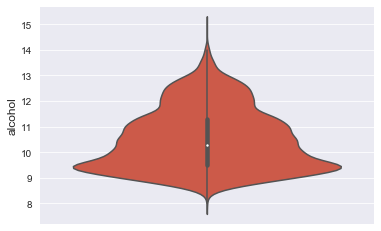

In [20]:
sns.violinplot(df['alcohol'], orient='v')

###### There is a bump at alcohol percentage values of around 9.5 which means more no. of observations in the dataset are having a alcohol percentage of around 9.5

............................................................

## Joint Distribution plot:

<Figure size 720x576 with 0 Axes>

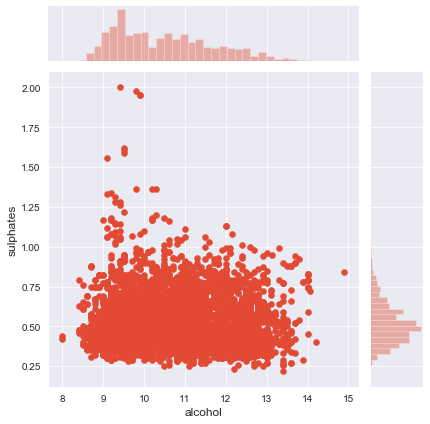

In [21]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(x='alcohol', y='sulphates', data=df)

###### It is clear that more no. of observations are having a alcohol percentage at around 9.5 whereas more no. of observations are having a sulphates value at around 0.5

-------------------
## Mean and Standard deviation:

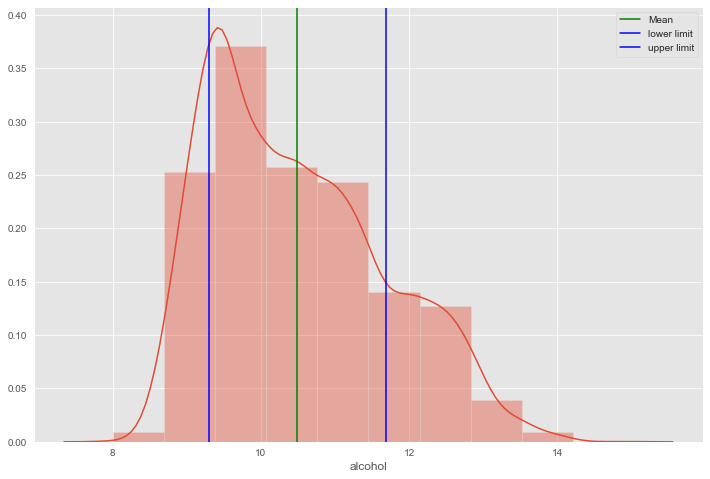

In [22]:
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
mean = df['alcohol'].mean()
one_dev = df['alcohol'].std()

sns.distplot(df['alcohol'], bins=10, kde=True)

plt.axvline(mean, color='green', label='Mean')
plt.axvline(mean-one_dev, color='blue', label='lower limit')
plt.axvline(mean+one_dev, color='blue', label='upper limit')

plt.legend()

###### The green vertical line tells that mean of the alcohol percentage is around 10.4 and the two blue vertical lines are 1 standard deviation away from the mean
--------------------

## Correlation Matrix:

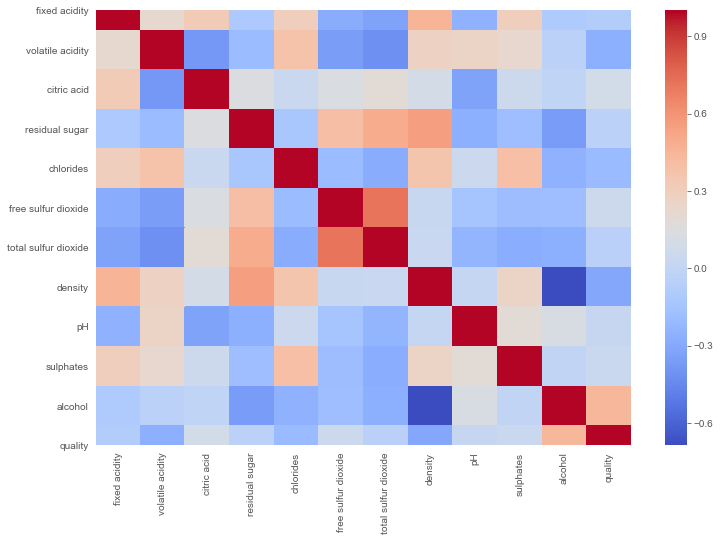

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')

###### It shows that the dependant variable quality is highly correlated with alcohol percentage of the wine i.e., if the alcohol percentage is more then the quality rank of the wine will be higher

----------------------------------------------------------------

## Data Cleaning:
............................................

## Checking for Null values:

In [24]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Since the no. of null values are very less we can just replace them with mean of their columns:

In [25]:
df['fixed acidity'] = df['fixed acidity'].fillna((df['fixed acidity'].mean()))
df['volatile acidity'] = df['volatile acidity'].fillna((df['volatile acidity'].mean()))
df['citric acid'] = df['citric acid'].fillna((df['citric acid'].mean()))
df['residual sugar'] = df['residual sugar'].fillna((df['residual sugar'].mean()))
df['chlorides'] = df['chlorides'].fillna((df['chlorides'].mean()))
df['pH'] = df['pH'].fillna((df['pH'].mean()))
df['sulphates'] = df['sulphates'].fillna((df['sulphates'].mean()))

In [26]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

..........................

## Converting the dependent variable into a binary output varibale:

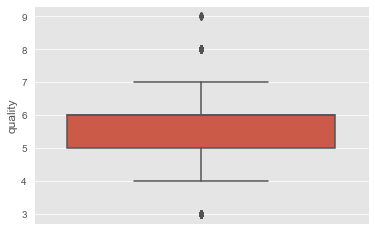

In [27]:
sns.boxplot(df['quality'], orient='v')

###### So from the above box plot, lets consider the quality above 3rd quartile as good i.e., if quality greater than 6 its good or else bad

In [28]:
df['quality'] = ['good' if x >= 6 else 'bad' for x in df['quality']]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [30]:
df['quality'].value_counts()

good    4113
bad     2384
Name: quality, dtype: int64

###### Now there are two categorical columns in our data: type and quality

...................
## Categorical Encoding:

##### Its better to use Dummy values approach for encoding the categorical columns as it gives the flexibility to encode as many categorical variables as we would want to and also gives the freedom to label the encoded columns using a prefix

In [31]:
df.select_dtypes(['object']).columns  #checking for the categorical columns in the dataset

Index(['type', 'quality'], dtype='object')

In [32]:
#making sure to avoid the multi-variable trap or to avoid encoding the duplicate information
dummies = pd.get_dummies(df['type'], drop_first=False)   


#now we got the encoded columns so no need to have the original categorical column in the dataset
df = df.drop(['type'], axis=1)

In [33]:
df = pd.concat([df, dummies], axis=1)

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,good,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,good,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,good,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,good,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,good,0,1


###### Now we can see 14th and 15th columns are Red wine and White wine respectively which are encoded with dummy variables

In [35]:
df.select_dtypes(['object']).columns

Index(['quality'], dtype='object')

--------------------------
## Train/Test Split:

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(['quality'], axis=1).values

In [38]:
y = df['quality'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

-----------------------------------
## Scaling:

##### Since we have many outliers, its better to use RobustScaler which scales the data based on quartiles range by excluding the outliers from scaling parameters like IQR, First Quartile etc., whereas the MinMaxScaler and the StandardScaler methods are very sensitive to outliers and thus will not help us to boost the performance of the model

In [40]:
from sklearn.preprocessing import RobustScaler

In [41]:
scaler = RobustScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
X_train

array([[ 0.53846154, -0.38888889,  0.73333333, ...,  0.83333333,
         0.        ,  0.        ],
       [-0.53846154, -0.66666667, -0.53333333, ..., -0.16666667,
         0.        ,  0.        ],
       [-0.15384615, -0.33333333,  0.06666667, ...,  1.22222222,
         0.        ,  0.        ],
       ...,
       [-0.76923077, -0.88888889, -0.2       , ...,  0.16666667,
         0.        ,  0.        ],
       [-0.23076923,  0.05555556,  1.2       , ..., -0.22222222,
         0.        ,  0.        ],
       [ 0.53846154,  2.22222222,  1.2       , ..., -0.55555556,
         1.        , -1.        ]])

In [45]:
X_train.shape

(5197, 13)

In [46]:
X_test

array([[ 0.23076923, -0.05555556,  0.73333333, ..., -0.72222222,
         0.        ,  0.        ],
       [-0.07692308,  4.44444444, -1.66666667, ...,  0.61111111,
         1.        , -1.        ],
       [ 1.92307692,  0.94444444, -0.46666667, ..., -0.16666667,
         1.        , -1.        ],
       ...,
       [-0.15384615,  0.05555556,  0.13333333, ..., -0.27777778,
         0.        ,  0.        ],
       [ 0.76923077,  0.22222222,  1.46666667, ..., -0.38888889,
         1.        , -1.        ],
       [-0.07692308, -0.22222222,  0.26666667, ...,  0.66666667,
         0.        ,  0.        ]])

In [47]:
y_train

array(['good', 'bad', 'good', ..., 'good', 'good', 'bad'], dtype=object)

In [48]:
y_test

array(['good', 'bad', 'good', ..., 'bad', 'good', 'good'], dtype=object)

------------------------------------------------

## Model Building:

In [55]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [66]:
models = []
 
models.append(('LR', LogisticRegression(max_iter=1000))) 
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.74 (0.014)
SVM: 0.74 (0.013)


### Challenges and Inferences from the above scores:

### Here Logistic Regression and SVM have same mean accuracy with slightly different standard deviation.

### So, Let's perform Hypothesis Testing to find the goodness of the models in a way to find the better model

-------
## Hypothesis Testing:

### Null Hypothesis (Ho): Both the models have same performance on the dataset

### Alternate Hypothesis (Ha): Both the models doesn't have same performance on the dataset

In [67]:
#!pip install mlxtend

In [69]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=LogisticRegression(), 
                          estimator2=SVC(), 
                          X=X, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.014
The t-statistics is = 3.703
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


### Here we considered a Confidence interval of 95% i.e., the level of significance for Hypothesis assessment is 0.05

## Since p<0.05, We can reject the null-hypothesis and Hence we can conclude that the two algorithms are significantly different.

## Since both the models are significantly different and the mean accuracies are already same. Let's select the better model based on standard deviation

## Since Support Vector Machine has less standard deviation it is better to deploy this model into production

# Thank You!!!!